In [1]:
import random

In [1]:
for j in range(10):
    print(random.randint(-5,5))


KeyboardInterrupt: 

In [ ]:
import numpy as np

a = np.array([1,2,3])
print(a)

np.save('probando_save_np.npy', a)

[1 2 3]


In [ ]:
b = np.load('probando_save_np.npy')
print(b)

[1 2 3]


In [ ]:
c = 4
print('Tengo ' + str(c) + ' perros')

Tengo 4 perros


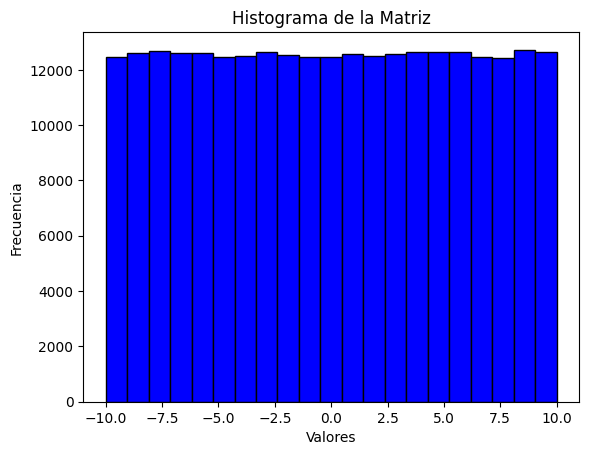

Valores en el histograma: [12478 12593 12689 12591 12607 12455 12517 12640 12525 12471 12462 12561
 12499 12572 12654 12627 12627 12448 12422 12727 12633]
Bordes de los bins: [-10.          -9.04761905  -8.0952381   -7.14285714  -6.19047619
  -5.23809524  -4.28571429  -3.33333333  -2.38095238  -1.42857143
  -0.47619048   0.47619048   1.42857143   2.38095238   3.33333333
   4.28571429   5.23809524   6.19047619   7.14285714   8.0952381
   9.04761905  10.        ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cargar_y_calcular_histograma(archivo_npy):
    try:
        # Cargar la matriz desde el archivo .npy
        matriz = np.load(archivo_npy)

        # Calcular el histograma de los valores en la matriz
        histograma = np.histogram(matriz, bins=21)  # Puedes ajustar el número de bins según tus necesidades

        # Desempaquetar los valores del histograma
        valores_histograma, bins = histograma

        # Trazar el histograma
        plt.hist(matriz.flatten(), bins=21, color='blue', edgecolor='black')
        plt.xlabel('Valores')
        plt.ylabel('Frecuencia')
        plt.title('Histograma de la Matriz')
        plt.show()

        return valores_histograma, bins, matriz

    except FileNotFoundError:
        print(f"El archivo {archivo_npy} no se encontró.")
        return None

# Ejemplo de uso
archivo_npy = 'uniform_10_pixels_variation.npy'  # Reemplaza con el nombre de tu archivo .npy
histograma_valores, bins, matriz = cargar_y_calcular_histograma(archivo_npy)

if histograma_valores is not None:
    print("Valores en el histograma:", histograma_valores)
    print("Bordes de los bins:", bins)


In [ ]:
print(np.max(matriz))
print(np.min(matriz))
print(matriz.shape[0]*matriz.shape[1] - np.count_nonzero(matriz))

10
-10
12462


In [ ]:
import pickle
with open('/nfs/bartesaghilab2/ds672/empiar10076/2023_10_30_output_tutorial_downsampling_256_z_8/analyze.49/umap.pkl', 'rb') as archivo:
    umap_emb = pickle.load(archivo)

print(objeto_cargado)

[[-1.9537752   6.240617  ]
 [ 2.8473802   6.736703  ]
 [-0.29597488 10.03585   ]
 ...
 [ 7.561227    1.982359  ]
 [11.278448    1.7863995 ]
 [ 8.471018    0.23968494]]


In [ ]:
import cryodrgn
from cryodrgn import analysis, utils, config

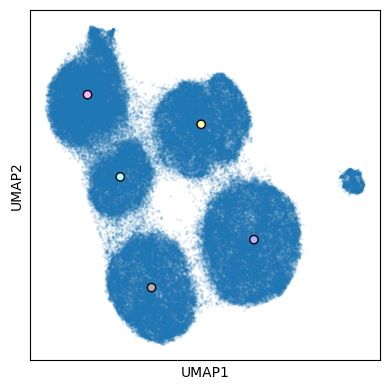

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(4, 4))
plt.scatter(umap_emb[:, 0], umap_emb[:, 1], alpha=0.1, s=1, rasterized=True)
plt.scatter(centers[:,0], centers[:,1], c=colors,edgecolor='black')
plt.xticks([])
plt.yticks([])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()

In [ ]:
# from typing import Optional, Union, Tuple, List

# def cluster_kmeans(
#     z: np.ndarray, K: int, on_data: bool = True, reorder: bool = True
# ) -> Tuple[np.ndarray, np.ndarray]:
#     """
#     Cluster z by K means clustering
#     Returns cluster labels, cluster centers
#     If reorder=True, reorders clusters according to agglomerative clustering of cluster centers
#     """
#     kmeans = KMeans(n_clusters=K, random_state=0, max_iter=10)
#     labels = kmeans.fit_predict(z)
#     centers = kmeans.cluster_centers_

#     centers_ind = None
#     if on_data:
#         centers, centers_ind = get_nearest_point(z, centers)

#     if reorder:
#         g = sns.clustermap(centers)
#         reordered = g.dendrogram_row.reordered_ind
#         centers = centers[reordered]
#         if centers_ind is not None:
#             centers_ind = centers_ind[reordered]
#         tmp = {k: i for i, k in enumerate(reordered)}
#         labels = np.array([tmp[k] for k in labels])
#     return labels, centers

# def get_nearest_point(
#     data: np.ndarray, query: np.ndarray
# ) -> Tuple[npt.NDArray[np.float32], np.ndarray]:
#     """
#     Find closest point in @data to @query
#     Return datapoint, index
#     """
#     ind = cdist(query, data).argmin(axis=1)
#     return data[ind], ind

# def save_pkl(data, out_pkl: str, mode: str = "wb") -> None:
#     if mode == "wb" and os.path.exists(out_pkl):
#         logger.warning(f"Warning: {out_pkl} already exists. Overwriting.")
#     with open(out_pkl, mode) as f:
#         pickle.dump(data, f)  # type: ignore

In [ ]:
import os
import numpy as np

outdir = '/hpc/home/ds672/master/aux_functions/'
# kmeans clustering
# logger.info("K-means clustering...")
K = 5
kmeans_labels, centers = analysis.cluster_kmeans(umap_emb, K, reorder=False)
#centers, centers_ind = analysis.get_nearest_point(umap_emb, centers)
if not os.path.exists(f"{outdir}/kmeans{K}_umap"):
    os.mkdir(f"{outdir}/kmeans{K}_umap")
utils.save_pkl(kmeans_labels, f"{outdir}/kmeans{K}_umap/labels_umap.pkl")
np.savetxt(f"{outdir}/kmeans{K}_umap/centers.txt", centers)
np.savetxt(f"{outdir}/kmeans{K}_umap/centers_ind.txt", centers_ind, fmt="%d")
# logger.info("Generating volumes...")
# vg.gen_volumes(f"{outdir}/kmeans{K}", centers)

/hpc/home/ds672/miniconda3/envs/cryodrgn/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(WARNING) (utils.py) (03-Nov-23 14:50:33) Warning: /hpc/home/ds672/master/aux_functions//kmeans5_umap/labels_umap.pkl already exists. Overwriting.


ValueError: 'c' argument has 5 elements, which is inconsistent with 'x' and 'y' with size 2.

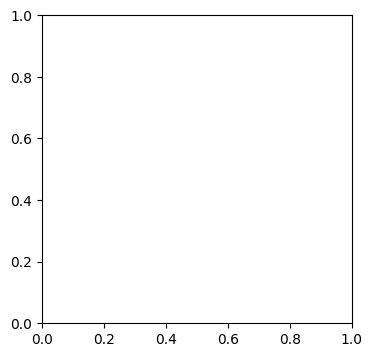

In [ ]:
import seaborn as sns

WORKDIR = '/nfs/bartesaghilab2/ds672/empiar10076/2023_10_30_output_tutorial_downsampling_256_z_8' 
EPOCH = 49 # CHANGE ME
colors = analysis._get_chimerax_colors(K)

#kmeans_ind = np.loadtxt(f'{WORKDIR}/analyze.{EPOCH}/kmeans{K}/centers_ind.txt', dtype=int)
kmeans_ind = centers_ind
f, ax = plt.subplots(figsize=(4,4))
#plt.scatter(umap_emb[:,0], umap_emb[:,1], alpha=.05, s=1,rasterized=True)
#plt.scatter(umap_emb[kmeans_ind,0], umap_emb[kmeans_ind,1], c=colors,edgecolor='black')
plt.scatter(centers[0], centers[1], c=colors,edgecolor='black')
labels = np.arange(len(kmeans_ind))
centers = umap_emb[kmeans_ind]
for i in labels:
    ax.annotate(str(i), centers[i, 0:2] + np.array([0.1, 0.1]))
plt.xticks([])
plt.yticks([])
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

In [ ]:
a = np.array([0,1,3,4,5])
b = [0,1,3,4,5]
cc = np.array([12,32,43,54,65,67,7,88,6,4,3,5,6,36,6])
print(cc[a])
print(b.shape)

[12 32 54 65 67]


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
import random

dim_b = 20
num_pixels = 20

a = [random.randint(-num_pixels, num_pixels) for _ in range(dim_b)]

print(a)

[5, 7, -19, -4, 10, 19, 14, 5, 11, 2, -12, -7, 10, -20, 3, -4, -20, 0, -16, 4]


In [ ]:
def generar_lista(N, sublistas):
    # Inicializar la lista final con listas vacías
    lista_final = [[] for _ in range(N)]

    # Recorrer las sublistas
    for posiciones, valores in sublistas:
        # Asignar los valores a las posiciones correspondientes en la lista final
        for i, valor in zip(posiciones, valores):
            lista_final[i].append(valor)

    return lista_final

# Ejemplo de uso
N = 5
sublistas = [([0, 1, 2, 3], [1, 2, 3, 13]), ([1, 3, 4], [4, 5, 6]), ([0, 2, 3], [7, 8, 9])]

resultado = generar_lista(N, sublistas)
print(resultado)

[[1, 7], [2, 4], [3, 8], [13, 5, 9], [6]]


In [ ]:
posiciones_listas = [[0, 1], [1, 3, 4], [0, 2, 3]]
valores_listas = [[1, 2], [4, 5, 6], [7, 8, 9]]

sublistas = [(posiciones, valores) for posiciones, valores in zip(posiciones_listas, valores_listas)]

print(sublistas)


[([0, 1], [1, 2]), ([1, 3, 4], [4, 5, 6]), ([0, 2, 3], [7, 8, 9])]


In [ ]:
def obtener_maximos_por_lista(lista_de_listas):
    # Usa la función map con max para obtener el máximo en cada lista
    maximos = list(map(max, lista_de_listas))
    return maximos

# Ejemplo de uso
lista_de_listas = [[1, 5, 3], [8, 2, 4], [6, 7, 9]]
maximos = obtener_maximos_por_lista(lista_de_listas)

print(maximos)

[5, 8, 9]


In [ ]:
def tiene_elementos_vacios(lista_de_listas):
    for sublista in lista_de_listas:
        if not sublista:
            return True  # Hay al menos una lista vacía

        for elemento in sublista:
            if not elemento:
                return True  # Hay al menos un elemento vacío

    return False  # No hay listas ni elementos vacíos

# Ejemplo de uso
mi_lista_de_listas = [[1, 2, 3], [], ['a', '', 'c'], [4, 5, 6]]

if tiene_elementos_vacios(mi_lista_de_listas):
    print("La lista de listas tiene elementos vacíos.")
else:
    print("La lista de listas no tiene elementos vacíos.")

La lista de listas tiene elementos vacíos.


In [ ]:
def encontrar_listas_vacias(lista_de_listas):
    posiciones_listas_vacias = []

    for i, sublista in enumerate(lista_de_listas):
        if not sublista:
            posiciones_listas_vacias.append(i)

    return posiciones_listas_vacias

# Ejemplo de uso
mi_lista_de_listas = [[1, 2, 3], [], ['a', 'c'], [4, 5, 6], []]

posiciones_listas_vacias = encontrar_listas_vacias(mi_lista_de_listas)

if posiciones_listas_vacias:
    print("Listas vacías encontradas en las posiciones:", posiciones_listas_vacias)
else:
    print("No se encontraron listas vacías.")


Listas vacías encontradas en las posiciones: [1, 4]


In [ ]:
import numpy as np

a = [1,2,3,4]
b = 3
c = 9
for el in a:
    if el == b:
        print(a.index(el))
#print(np.where(b == a))

2


In [ ]:
for j in range(3):
    for i in range(10):
        print(i)
        if i == 3:
            break

0
1
2
3
0
1
2
3
0
1
2
3


In [ ]:
a = np.array([2,4,6,8])
#b = a.index(2)
c  = 6
#c = a.index(7)

if c in a:
    print(f"El elemento {c} está en la lista")
else:
    print(f"El elemento {c} no está en la lista")

print(b)
print(c)

El elemento 6 está en la lista
0
6


In [ ]:
a = None
b = [1,2]
if not a:
    print('not a')
if a:
    print('a')
if not b:
    print('not b')
if b:
    print('b')

not a
b


In [ ]:
def leer_archivo_y_generar_lista(nombre_archivo):
    try:
        with open(nombre_archivo, 'r') as archivo:
            # Lee todas las líneas del archivo
            lineas = archivo.readlines()

            # Convierte cada línea a un entero y agrégalo a la lista
            lista_enteros = [int(linea.strip()) for linea in lineas]

        return lista_enteros

    except FileNotFoundError:
        print(f"El archivo '{nombre_archivo}' no fue encontrado.")
        return None
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return None

# Ejemplo de uso
nombre_archivo = '/nfs/bartesaghilab2/ds672/empiar10076/2023_11_06_output_tutorial_downsampling_256_z_8_20pixels_translation/analyze.49/kmeans5/centers_ind.txt'  # Reemplaza 'archivo.txt' con el nombre de tu archivo
resultado = leer_archivo_y_generar_lista(nombre_archivo)

if resultado is not None:
    print(f"Lista de enteros generada: {resultado}")


Lista de enteros generada: [67938, 127155, 131300, 113422, 78060]


In [ ]:
idxs = [1, 2, 3]
corrs = ['a', 'b', 'c']
sublist = [(idx_tot, corr_tot) for idx_tot, corr_tot in zip(idxs, corrs)]
print(sublist)  # Output: [(1, 'a'), (2, 'b'), (3, 'c')]


[(1, 'a'), (2, 'b'), (3, 'c')]


In [ ]:
N = 3
final_list = [[] for _ in range(N)]
print(final_list)

[[], [], []]


In [ ]:
import numpy as np

a = np.array([1,5,7,3,1])
b = np.array([3,4,2,8,9])
print(np.argmax(a))
print(b[np.argmax(a)])

2
2


In [ ]:
from poses_functions import *

input_cs_path = '/nfs/bartesaghilab2/ds672/empiar10076/inputs/initial_hidden_variables/filtered_particles/J24_003_particles.cs'
output_pkl_path = '/nfs/bartesaghilab2/ds672/empiar10076/inputs/initial_hidden_variables/filtered_particles/J24_003_particles.pkl'
extract_info_from_cs(input_cs_path)
_, _, _, filtered_indexes = process_and_save_data(input_cs_path, output_pkl_path)

0 uid 17627880363220974845
1 blob/path b'J20/imported/017627880363220974845_L17Combine_weight_local.mrc'
2 blob/idx 0
3 blob/shape [320 320]
4 blob/psize_A 1.31
5 blob/sign 1.0
6 blob/import_sig 5998482269839751963
7 ctf/type b'imported'
8 ctf/exp_group_id 6
9 ctf/accel_kv 300.0
10 ctf/cs_mm 2.7
11 ctf/amp_contrast 0.07
12 ctf/df1_A 15301.1
13 ctf/df2_A 14916.4
14 ctf/df_angle_rad 0.092153385
15 ctf/phase_shift_rad 0.0
16 ctf/scale 1.0
17 ctf/scale_const 0.0
18 ctf/shift_A [0. 0.]
19 ctf/tilt_A [0. 0.]
20 ctf/trefoil_A [0. 0.]
21 ctf/tetra_A [0. 0. 0. 0.]
22 ctf/anisomag [0. 0. 0. 0.]
23 ctf/bfactor 0.0
24 alignments3D/split 0
25 alignments3D/shift [3.25 9.55]
26 alignments3D/pose [-1.8548019  -0.09466853  1.5532651 ]
27 alignments3D/psize_A 1.31
28 alignments3D/error 24644.475
29 alignments3D/error_min 0.0
30 alignments3D/resid_pow 0.0
31 alignments3D/slice_pow 144.83609
32 alignments3D/image_pow 24863.367
33 alignments3D/cross_cor 363.72852
34 alignments3D/alpha 1.0
35 alignments3D/a

In [ ]:
print(filtered_indexes)
idx_pkl_file = '/nfs/bartesaghilab2/ds672/empiar10076/inputs/initial_hidden_variables/filtered_particles/indexes.pkl'
with open(idx_pkl_file, 'wb') as file:
    pickle.dump(filtered_indexes, file)
    
print(len(filtered_indexes))

[     0      1      3 ... 131896 131897 131898]
119147


In [ ]:
import os
print(os.getcwd())  # Muestra el directorio actual

if os.path.exists(labels_path):
    print("El directorio o archivo existe")
else:
    print("El directorio no existe")


/nfs/bartesaghilab2/ds672/master/aux_functions
El directorio o archivo existe


In [ ]:
import pickle
import numpy as np
from poses_functions import *

#Pruebo que poses_processing funcione con all_particles
labels_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/labels.pkl'
particles_per_label_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/particles_per_label'
poses_processed_precryodrgn_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/processed_poses_2/poses_without_cryodrgn_processing.pkl'
poses_processed_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/processed_poses/poses_processed.pkl'

#Labels
try:
    with open(labels_path, 'rb') as file:
        labels = pickle.load(file)
except EOFError:
    print(f"Error: El archivo labels_path está vacío o corrupto.")

print(f'{labels=}')
print(f'{len(labels)=}\n')

#Particles per label
particles_per_label = []
if not os.path.isdir(particles_per_label_path):
    print(f"Error: La carpeta '{particles_per_label_path}' no existe.\n")
else:
    # Recorre todos los archivos en la carpeta
    for filename in sorted(os.listdir(particles_per_label_path)):
        file_path = os.path.join(particles_per_label_path, filename)
        print(f'{file_path=}')
        # Verifica que sea un archivo (y no un subdirectorio)
        try:
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                particles_per_label.append(data)
                print(f"✅ Archivo '{filename}' cargado correctamente.\n")
        except EOFError:
            print(f"⚠️ Error: El archivo '{filename}' está vacío o corrupto.\n")
        except pickle.UnpicklingError:
            print(f"❌ Error: No se pudo deserializar '{filename}', el formato no es válido.\n")
        except Exception as e:
            print(f"⚠️ Error desconocido en '{filename}': {e}")
    particles_per_label_length = sum(len(particles) for particles in particles_per_label)
    print(f'{particles_per_label_length=}\n')

#Poses processed
try:
    with open(poses_processed_precryodrgn_path, 'rb') as file:
        poses_processed_precryodrgn = pickle.load(file)
except EOFError:
    print(f"Error: El archivo poses_processed_precryodrgn_path está vacío o corrupto.\n")

print(f'{len(poses_processed_precryodrgn[0])=}\n')

labels=array([0, 1, 2, ..., 4, 4, 4])
len(labels)=119147

file_path='/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/particles_per_label/particles_class_0.pkl'
✅ Archivo 'particles_class_0.pkl' cargado correctamente.

file_path='/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/particles_per_label/particles_class_1.pkl'
✅ Archivo 'particles_class_1.pkl' cargado correctamente.

file_path='/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/particles_per_label/particles_class_2.pkl'
✅ Archivo 'particles_class_2.pkl' cargado correctamente.

file_path='/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/particles_per_label/particles_class_3.pkl'
✅ Archivo 'particles_class_3.pkl' cargado correctamente.

file_path='/nfs/bartesaghilab2/ds672/empiar10076/experimen

In [ ]:
poses_cs_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/refinement_per_label'
files = sorted(os.listdir(poses_cs_path))
print(files)
files = [os.path.join(poses_cs_path, file) for file in files]
rots, trans = [], []
for file in files:
    rot, tran, _, _ = extract_info_from_cs(file)
    rots.append(rot), trans.append(tran)

['J35_004_particles.cs', 'J36_004_particles.cs', 'J37_005_particles.cs', 'J38_004_particles.cs', 'J39_003_particles.cs']
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting rotations from alignments3D/pose
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting translations from alignments3D/shift
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting cross_correlations from alignments3D/cross_cor
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting indexs from blob/idx
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting rotations from alignments3D/pose
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting translations from alignments3D/shift
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting cross_correlations from alignments3D/cross_cor
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting indexs from blob/idx
(INFO) (poses_functions.py) (25-Feb-25 14:02:19) Extracting rotations from alignments3D/pose
(INFO) (poses_functions.py) (2

In [ ]:
print(labels[0:10])
print(f'Partícula 1')
print(rots[0][0])
print(trans[0][0])
print(poses_processed_precryodrgn[0][0])
print(poses_processed_precryodrgn[1][0])
print()
print(f'Partícula 2')
print(rots[1][0])
print(poses_processed_precryodrgn[0][1])
print(trans[1][0])
print(poses_processed_precryodrgn[1][1])
print()
print(f'Partícula 3')
print(rots[2][0])
print(poses_processed_precryodrgn[0][2])
print(trans[2][0])
print(poses_processed_precryodrgn[1][2])
print()
print(f'Partícula 4')
print(rots[0][1])
print(poses_processed_precryodrgn[0][3])
print(trans[0][1])
print(poses_processed_precryodrgn[1][3])
print()
print(f'Partícula 5')
print(rots[3][0])
print(poses_processed_precryodrgn[0][4])
print(trans[3][0])
print(poses_processed_precryodrgn[1][4])

[0 1 2 0 3 0 2 3 3 2]
Partícula 1
[-0.8029294   1.3148407  -0.07363108]
[ 5.15 11.25]
[-0.8029294   1.3148407  -0.07363108]
[ 5.15 11.25]

Partícula 2
[-0.2769931  1.5743026  1.9599892]
[-0.2769931  1.5743026  1.9599892]
[-19.85   4.75]
[-19.85   4.75]

Partícula 3
[2.3667133  0.02454369 1.174591  ]
[2.3667133  0.02454369 1.174591  ]
[-17.85  -8.25]
[-17.85  -8.25]

Partícula 4
[1.1956284 0.6135923 1.7636396]
[1.1956284 0.6135923 1.7636396]
[ 16.85 -15.55]
[ 16.85 -15.55]

Partícula 5
[0.68371713 1.2096534  1.5182027 ]
[0.68371713 1.2096534  1.5182027 ]
[24.15 -6.05]
[24.15 -6.05]


In [ ]:
import pickle

poses_processed_precryodrgn_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_02_18_z8_ds128_filtered_iter0/analyze.49/kmeans5_umap/processed_poses_2/poses_without_cryodrgn_processing.pkl'

try:
    with open(poses_processed_precryodrgn_path, 'rb') as file:
        poses_processed_precryodrgn = pickle.load(file)
except EOFError:
    print(f"Error: El archivo poses_processed_precryodrgn_path está vacío o corrupto.\n")

In [ ]:
print(len(poses_processed_precryodrgn[0]))

119147


In [ ]:
my_labels_ribosembly_path = '/nfs/bartesaghilab2/ds672/cryobench/Ribosembly/2025_02_25_z8/analyze.49/kmeans16_umap/labels.pkl'
with open(my_labels_ribosembly_path, 'rb') as file:
        my_labels_ribosembly = pickle.load(file)
print(my_labels[11000:11180])
print(f'{len(my_labels)=}')

[ 8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8 11  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8 11  8  8  8  8  8  8  8  8
  8  8  8  9  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  9  8  8  8  8  8  8  8  8  8  8]
len(my_labels)=335240


In [ ]:
gt_labels_ribosembly_path = '/nfs/bartesaghilab2/ds672/cryobench/Ribosembly/gt_latents.pkl'
with open(gt_labels_ribosembly_path, 'rb') as file:
        gt_labels_ribosembly = pickle.load(file)
print(gt_labels_ribosembly[1000:1180])
print(f'{len(gt_labels_ribosembly)=}')


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
len(gt_labels_ribosembly)=335240


In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score


ari_ribosembly = adjusted_rand_score(gt_labels_ribosembly, my_labels_ribosembly)
ami_ribosembly = adjusted_mutual_info_score(gt_labels_ribosembly, my_labels_ribosembly)

print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Adjusted Mutual Information (AMI): {ami_ribosembly}')

Adjusted Rand Index (ARI): 0.8825507440964118
Adjusted Mutual Information (AMI): 0.9391348442800326


In [ ]:
print(gt_labels_ribosembly[-10:])

[15 15 15 15 15 15 15 15 15 15]


In [ ]:
import pickle

maps_empiar10180_path = '/nfs/bartesaghilab2/ds672/empiar10180/experiments/2025_02_26_z8_ds256/analyze.49/umap.pkl'
with open(umaps_empiar10180_path, 'rb') as file:
        umaps_empiar10180 = pickle.load(file)
print(umaps_empiar10180[0:10])

[[7.0841174  9.649928  ]
 [7.6515346  9.504668  ]
 [6.933299   9.289288  ]
 [9.7452545  7.6083584 ]
 [8.573069   9.187077  ]
 [4.622047   7.9989734 ]
 [6.383285   9.614525  ]
 [0.59207255 8.772302  ]
 [3.9494524  7.139415  ]
 [2.5364032  8.541464  ]]


In [ ]:
from poses_functions import *

rot_cs, trans_cs, _, _ = extract_info_from_cs('../../empiar10076/inputs/initial_hidden_variables/all_particles/J3_003_particles.cs')
print(rot)

(INFO) (poses_functions.py) (11-Apr-25 11:04:02) Extracting rotations from alignments3D/pose
(INFO) (poses_functions.py) (11-Apr-25 11:04:03) Extracting translations from alignments3D/shift
(INFO) (poses_functions.py) (11-Apr-25 11:04:03) Extracting cross_correlations from alignments3D/cross_cor
(INFO) (poses_functions.py) (11-Apr-25 11:04:03) Extracting indexs from blob/idx
[[ 0.8099418  -1.3078282  -0.07363108]
 [-0.08765604  3.2572987   0.6416423 ]
 [-2.3737257  -0.06661859  1.2026409 ]
 ...
 [ 0.05960611  0.89409167 -0.73280454]
 [ 0.19985579  1.2727658   1.0553788 ]
 [-0.29803056 -1.4831402   0.7889044 ]]


In [ ]:
import numpy as np
import pickle

def par_to_pkl(par_path): #, output_pkl_path):
    rotations = []
    translations = []

    with open(par_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('C'):
                continue  # Ignorar comentarios y líneas vacías

            parts = line.split()
            if len(parts) < 6:
                continue  # Línea inválida

            # Extraer PSI, THETA, PHI (índices 1, 2, 3)
            psi = float(parts[1])
            theta = float(parts[2])
            phi = float(parts[3])
            # Extraer SHX, SHY (índices 4, 5)
            shx = float(parts[4])
            shy = float(parts[5])

            rotations.append([psi, theta, phi])
            translations.append([shx, shy])

    rotations = np.array(rotations)
    translations = np.array(translations)

    return rotations, translations
    # # Guardar como tupla de arrays
    # with open(output_pkl_path, 'wb') as f:
    #     pickle.dump((rotations, translations), f)

    # print(f"Guardado {len(rotations)} poses en: {output_pkl_path}")

# Ejemplo de uso:
# par_to_pkl("tu_archivo.par", "poses.pkl")


# Ejemplo de uso
rot_par_first, trans_par_first = par_to_pkl("../../nextpyp/empiar10076/output_parameter_file_first.par") #, "../poses_del_par_N_noproj.pkl")
rot_par_N, trans_par_N = par_to_pkl("../../nextpyp/empiar10076/output_parameter_file_N.par") #, "../poses_del_par_N_noproj.pkl")
rot_par_N_noproj, trans_par_N_noproj = par_to_pkl("../../nextpyp/empiar10076/output_parameter_file_N_noproj.par") #, "../poses_del_par_N_noproj.pkl")

In [ ]:
print('Rotaciones de .cs: \n',rot_cs)
print('Tipo de dato: ',type(rot_cs[0][0]))
print('Máximo: ', np.max(rot_cs))
print('Mínimo: ', np.min(rot_cs))
print('Valor medio:', np.mean(rot_cs, axis=0))
print('\n')

print('Rotaciones de .par (first): \n', rot_par_first)
print('Tipo de dato: ', type(rot_par_first[0][0]))
print('Máximo: ', np.max(rot_par_first))
print('Mínimo: ', np.min(rot_par_first))
print('Valor medio: ', np.mean(rot_par_first, axis=0))
print()

# print(rot_par_N)
# print(type(rot_par_N[0][0]))
# print(np.max(rot_par_N))
# print(np.min(rot_par_N))

# print(rot_par_N_noproj)
# print(type(rot_par_N_noproj[0][0]))
# print(np.max(rot_par_N_noproj))
# print(np.min(rot_par_N_noproj))

Rotaciones de .cs: 
 [[ 0.8099418  -1.3078282  -0.07363108]
 [-0.08765604  3.2572987   0.6416423 ]
 [-2.3737257  -0.06661859  1.2026409 ]
 ...
 [ 0.05960611  0.89409167 -0.73280454]
 [ 0.19985579  1.2727658   1.0553788 ]
 [-0.29803056 -1.4831402   0.7889044 ]]
Tipo de dato:  <class 'numpy.float32'>
Máximo:  3.362486
Mínimo:  -3.362486
Valor medio: [-0.05171296 -0.07017922 -0.06584986]


Rotaciones de .par (first): 
 [[ 157.38   16.6  -103.9 ]
 [ 113.97   94.01 -145.77]
 [-141.58   95.59 -153.94]
 ...
 [  73.98  131.01 -149.83]
 [ 101.08  177.07  148.52]
 [ 188.73   31.4   -44.62]]
Tipo de dato:  <class 'numpy.float64'>
Máximo:  485.81
Mínimo:  -268.67
Valor medio:  [ 93.52875063  85.11164194 -14.70390162]



In [ ]:
print('Traslaciones de .cs: \n',trans_cs)
print('Tipo de dato: ',type(trans_cs[0][0]))
print('Máximo: ', np.max(trans_cs))
print('Mínimo: ', np.min(trans_cs))
print('Valor medio:', np.mean(trans_cs, axis=0))
print('\n')

print('Traslaciones de .par (first): \n',trans_par_first)
print('Tipo de dato: ', type(trans_par_first[0][0]))
print('Máximo: ', np.max(trans_par_first))
print('Mínimo: ', np.min(trans_par_first))
print('Valor medio: ', np.mean(trans_par_first, axis=0))
print()

# print('Traslaciones de .par (first): \n', trans_par_N)
# print('Tipo de dato: ', type(trans_par_N[0][0]))
# print('Máximo',np.max(trans_par_N))
# print(np.min(trans_par_N))
# print("Promedio trans_par_N:", np.mean(trans_par_N, axis=0))
# print()

# print(trans_par_N_noproj)
# print(type(trans_par_N_noproj[0][0]))
# print(np.max(trans_par_N_noproj))
# print(np.min(trans_par_N_noproj))
# print("Promedio trans_par_N_noproj:", np.mean(trans_par_N_noproj, axis=0))


Traslaciones de .cs: 
 [[  2.75   9.65]
 [-19.55   8.85]
 [-15.05  -7.75]
 ...
 [-31.25   0.75]
 [ 12.75  -0.15]
 [  1.55 -13.55]]
Tipo de dato:  <class 'numpy.float32'>
Máximo:  35.15
Mínimo:  -35.15
Valor medio: [-3.1121647 -3.590329 ]


[[  5.95  -8.49]
 [ 19.64   5.62]
 [ 25.19   0.59]
 ...
 [ 38.97  -1.79]
 [-12.72   2.16]
 [  2.92  11.42]]
Tipo de dato:  <class 'numpy.float64'>
Máximo:  110.35
Mínimo:  -255.23
Valor medio:  [1.95102055 2.61132836]



In [ ]:
import numpy as np

def match_poses_scales(rotations_A, rotations_B):
    """
    Escala los vectores de rotación o traslación de B para que sus componentes tengan
    el mismo rango que los de A.
    
    Parámetros:
    - rotations_A: np.ndarray de shape (N, x) → conjunto de referencia
    - rotations_B: np.ndarray de shape (N, x) → conjunto a escalar

    Devuelve:
    - rotations_B_scaled: np.ndarray de shape (N, x)
    """
    min_A = rotations_A.min(axis=0)
    max_A = rotations_A.max(axis=0)
    min_B = rotations_B.min(axis=0)
    max_B = rotations_B.max(axis=0)

    # Evitar división por cero si hay componentes constantes
    scale = (max_A - min_A) / (max_B - min_B + 1e-8)
    offset = min_A - min_B * scale

    rotations_B_scaled = rotations_B * scale + offset
    return rotations_B_scaled


In [ ]:
# Ejemplo de uso

rot_par_first_scaled = match_poses_scales(rot_cs, rot_par_first)
trans_par_first_scaled = match_poses_scales(trans_cs, trans_par_first)

rot_par_N_scaled = match_poses_scales(rot_cs, rot_par_N)
trans_par_N_scaled = match_poses_scales(trans_cs, trans_par_N)

rot_par_N_noproj_scaled = match_poses_scales(rot_cs, rot_par_N_noproj)
trans_par_N_noproj_scaled = match_poses_scales(trans_cs, trans_par_N_noproj)

print(trans_par_first)
print()
print(trans_par_first_scaled)
print()
print(trans_cs)

[[  5.95  -8.49]
 [ 19.64   5.62]
 [ 25.19   0.59]
 ...
 [ 38.97  -1.79]
 [-12.72   2.16]
 [  2.92  11.42]]

[[15.07417594 15.84450719]
 [17.70672433 18.7757514 ]
 [18.77397368 17.73080751]
 ...
 [21.42382882 17.23638077]
 [11.48398759 18.05696296]
 [14.49151548 19.98065689]]

[[  2.75   9.65]
 [-19.55   8.85]
 [-15.05  -7.75]
 ...
 [-31.25   0.75]
 [ 12.75  -0.15]
 [  1.55 -13.55]]


In [ ]:
# Guardar como tupla de arrays
output_pkl_path = '../../nextpyp/empiar10076/output_parameter_file_first_scaled.par'
with open(output_pkl_path, 'wb') as f:
    pickle.dump((rot_par_first_scaled, trans_par_first_scaled), f)

print(f"Guardado {len(rot_par_first_scaled)} poses en: {output_pkl_path}")

Guardado 131899 poses en: ../../nextpyp/empiar10076/output_parameter_file_first_scaled.par


In [ ]:
poses_for_cryodrgn(rot_par_first_scaled, trans_par_first_scaled, output_path = '../../nextpyp/empiar10076/poses_del_par_first_scaled_4cryodrgn.pkl', D = 320)

(INFO) (poses_functions.py) (11-Apr-25 13:15:03) Transposing rotation matrix
(INFO) (poses_functions.py) (11-Apr-25 13:15:04) (131899, 3, 3)


(array([[[-0.84371025, -0.50993948,  0.1676745 ],
         [ 0.02694889,  0.27172877,  0.96199648],
         [-0.53612197,  0.81616494, -0.21551805]],
 
        [[-0.54633858, -0.8342422 , -0.07452594],
         [ 0.83754738, -0.54359293, -0.05496459],
         [ 0.005342  , -0.09244828,  0.99570316]],
 
        [[-0.01231747, -0.04282854,  0.9990065 ],
         [-0.08778667, -0.99517823, -0.0437468 ],
         [ 0.99606314, -0.08823831,  0.0084983 ]],
 
        ...,
 
        [[-0.77588902, -0.6258106 , -0.07973276],
         [ 0.4208741 , -0.41932143, -0.80438456],
         [ 0.46995873, -0.65767061,  0.58873437]],
 
        [[-0.98699715,  0.05043727, -0.15261945],
         [-0.12381452,  0.36692405,  0.92197435],
         [ 0.10250162,  0.92888257, -0.35590812]],
 
        [[-0.23960628, -0.79979751,  0.55037511],
         [-0.04812787,  0.57597635,  0.81604837],
         [-0.96967651,  0.16904194, -0.1765001 ]]]),
 array([[0.0471068 , 0.04951408],
        [0.05533351, 0.05867422],

In [ ]:
def crop_par(archivo_entrada, archivo_salida, n_filas_a_eliminar):
    """
    Lee un archivo .par, elimina las primeras n_filas_a_eliminar filas y guarda el resultado en un nuevo archivo.

    :param archivo_entrada: Ruta al archivo .par original
    :param archivo_salida: Ruta al nuevo archivo .par recortado
    :param n_filas_a_eliminar: Número de filas al principio del archivo que se deben eliminar
    """
    with open(archivo_entrada, 'r') as f_in:
        lineas = f_in.readlines()

    # Filtramos las líneas, preservando comentarios (líneas que comienzan con "C ")
    lineas_filtradas = []
    num_eliminadas = 0
    for linea in lineas:
        if linea.strip().startswith('D'):
            lineas_filtradas.append(linea)  # mantener comentarios
        elif num_eliminadas < n_filas_a_eliminar:
            num_eliminadas += 1  # eliminar líneas de datos
        else:
            lineas_filtradas.append(linea)

    with open(archivo_salida, 'w') as f_out:
        f_out.writelines(lineas_filtradas)
        
input_par_path = '/nfs/bartesaghilab2/ds672/nextpyp/empiar10076/output_parameter_file_N.par'
output_par_path = '/nfs/bartesaghilab2/ds672/nextpyp/empiar10076/output_parameter_file_N_cropped.par'
C = 53
crop_par(input_par_path, output_par_path, 53)

In [ ]:
input_par_path = '/nfs/bartesaghilab2/ds672/nextpyp/empiar10076/output_parameter_file_N.par'
output_par_path = '/nfs/bartesaghilab2/ds672/nextpyp/empiar10076/output_parameter_file_N_cropped.par'
C = 53
crop_par(input_par_path, output_par_path, 53)

In [ ]:
def modificar_star(archivo_entrada, archivo_salida):
    """
    Modifica un archivo .star comentando el bloque data_optics '_rlnImageName'
    - Comenta el bloque 'data_optics'
    - Comenta '_rlnImageName'
    """
    with open(archivo_entrada, 'r') as f:
        lineas = f.readlines()

    nueva_lista = []
    en_optics = False
    en_particles = False
    header_modificado = False

    for i, linea in enumerate(lineas):
        linea_strip = linea.strip()

        if linea_strip.startswith("data_optics"):
            en_optics = True
            nueva_lista.append("#" + linea)
            continue

        if en_optics:
            if linea_strip == "data_particles":
                en_optics = False
                en_particles = True
                nueva_lista.append(linea)
                continue
            else:
                nueva_lista.append("#" + linea)
                continue

        if en_particles and not header_modificado:
            if linea_strip.startswith("_rlnImageName"):
                nueva_lista.append("#" + linea)
            else:
                nueva_lista.append(linea)
        else:
            nueva_lista.append(linea)

    with open(archivo_salida, 'w') as f:
        f.writelines(nueva_lista)

input_star_file = '/nfs/bartesaghilab2/ds672/nextpyp/empiar10076/output_parameter_file_N_cropped_pyem.star'
output_star_file = '/nfs/bartesaghilab2/ds672/nextpyp/empiar10076/output_parameter_file_N_cropped_pyem_4parse.star'

modificar_star(input_star_file, output_star_file)

In [ ]:
input_star_file = '/nfs/bartesaghilab2/ds672/nextpyp/empiar10076/output_parameter_file_N_cropped_pyem.star'
output_star_file = '/nfs/bartesaghilab2/ds672/nextpyp/empiar10076/output_parameter_file_N_cropped_pyem_4parse.star'

modificar_star(input_star_file, output_star_file)

In [ ]:
import sys
sys.path.append('/nfs/bartesaghilab2/ds672/cryobench/CryoBench/metrics')

from information_imbalance import compute_information_imbalance
from neighborhood_similarity import cal_neighb_hit_werror

['cryosparc_3dflex_embeddings', 'cryosparc_3dva_embeddings', 'ctf_zscore_embeddings', 'drgnai_fixed_pose_embeddings', 'gt_angle_embeddings', 'gt_s1_embeddings', 'recovar_embeddings', 'cryodrgn_embeddings', 'cryodrgn2_embeddings', 'drgnai_abinit_embeddings', 'drgnai_fixed_embeddings', 'opusdsd_mu_embeddings']
cryosparc_3dflex_embeddings (100000, 2) (100000, 2)


In [ ]:
import mrcfile

with mrcfile.open('/nfs/bartesaghilab2/ds672/empiar10076/empiar_data/L17Combine_weight_local.mrc', permissive=True) as mrc:
    data = mrc.data  # numpy array: shape (N, Y, X)
    print("Shape del stack:", data.shape)


Shape del stack: (131899, 320, 320)


In [ ]:
import numpy as np
import pickle
import os
import shutil
import argparse
from collections import defaultdict

def labels_per_classes(labels_path, output_path):
    '''
    Recibe salida labels.pkl de cryoDRGN y separa índices de partículas por clases
    Input: Path de labels.pkl, path donde crea carpeta particles_per_classes
    Output: K archivos particles_class_X.pkl en output_path
    Ejemplo de uso: labels_per_classes('./labels.pkl','./particles_per_classes')
    '''
    with open(labels_path, 'rb') as file:
        labels = pickle.load(file)

    N = len(labels)
    indexes = np.arange(0, N, 1, dtype=int)

    particle_per_class = defaultdict(list)

    for index, label in zip(indexes, labels):
        particle_per_class[label].append(index)  

    for class_, list_ in particle_per_class.items():
        globals()[f"particles_class_{class_}"] = list_

    particles_per_classes = [particle_per_class[k] for k in sorted(particle_per_class.keys())]

    sum_len_classes = sum(len(clase) for clase in particles_per_classes)
    # print(sum_len_classes)
    assert sum_len_classes == N, f'La suma de partículas por clase es distinta a {N}'

    if os.path.exists(output_path):
        shutil.rmtree(output_path)
    # Creamos el directorio
    os.makedirs(output_path)
    for class_, list_ in particle_per_class.items():
        with open(output_path + f"/particles_class_{class_}.pkl", "wb") as file:
            pickle.dump(list_, file)
    return

In [ ]:
labels = [0,2,1,2,2,1,0,0,1]
labels_per_classes(labels, 'particles_per_classes')
for i in range(3):
    with open('particles_per_classes/particles_class_' + str(i) + '.pkl', 'rb') as file:
        labels[i] = pickle.load(file)
        print(labels[i])

[0, 6, 7]
[2, 5, 8]
[1, 3, 4]


In [ ]:
subset = data[:10000]  # Las primeras 10,000 partículas

with mrcfile.new('particulas_10k.mrc', overwrite=True) as mrc_out:
    mrc_out.set_data(subset.astype(np.float32))


In [ ]:
labels_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2024_05_13_z8_ds128_screen/analyze.49/kmeans5_umap/labels.pkl'
labels_per_classes(labels_path, 'particles_per_classes')
i=0
#for i in range(5):
with open('particles_per_classes/particles_class_' + str(i) + '.pkl', 'rb') as file:
    labels = pickle.load(file)
    #print(labels)
    print(len(labels))

import mrcfile

with mrcfile.open('/nfs/bartesaghilab2/ds672/empiar10076/empiar_data/L17Combine_weight_local.mrc', permissive=True) as mrc:
    data = mrc.data  # numpy array: shape (N, Y, X)
    print("Shape del stack:", data.shape)

subset = data[labels]
with mrcfile.new('particles_cluster0.mrc', overwrite=True) as mrc_out:
    mrc_out.set_data(subset.astype(np.float32))

34265
Shape del stack: (131899, 320, 320)


In [ ]:
for i in range(5):
    with open('particles_per_classes/particles_class_' + str(i) + '.pkl', 'rb') as file:
        labels = pickle.load(file)
        #print(labels)
        print(len(labels))

34265
28024
25227
27900
16483


In [ ]:
import re

def renumerar_star_image_index(archivo_star, salida_star):
    with open(archivo_star, 'r') as f:
        lineas = f.readlines()

    nuevas_lineas = []
    contador = 1 #parfile ignora el 0

    for linea in lineas:
        # Coincide con las líneas de datos que tienen formato tipo "12@archivo.mrcs"
        if re.match(r"^\s*\d+@.*", linea):
            partes = linea.strip().split()
            imagen, *resto = partes
            # Extrae solo la parte después del "@"
            _, nombre_archivo = imagen.split("@", 1)
            nuevo_imagen = f"{contador}@{nombre_archivo}"
            nuevas_lineas.append(f"{nuevo_imagen} {' '.join(resto)}\n")
            contador += 1
        else:
            nuevas_lineas.append(linea)

    with open(salida_star, 'w') as f:
        f.writelines(nuevas_lineas)
        
entrada = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/starfiles_per_label/Cluster0_iter0_10particles.star'
salida = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/starfiles_per_label/Cluster0_iter0_10particles_modified.star'
renumerar_star_image_index(entrada, salida)

In [ ]:
#import pickle

#def restaurar_indices_star(archivo_star, archivo_pkl, salida_star):
    # Cargar los índices originales
#    with open(archivo_pkl, 'rb') as f:
#        indices_originales = pickle.load(f)

#    with open(archivo_star, 'r') as f:
#        lineas = f.readlines()

#    nuevas_lineas = []
#    idx = 0

#    for linea in lineas:
#        if re.match(r"^\s*\d+@.*", linea):
#            partes = linea.strip().split()
#            _, nombre_archivo = partes[0].split("@", 1)
#            nuevo_indice = indices_originales[idx]
#            nueva_linea = f"{nuevo_indice}@{nombre_archivo} {' '.join(partes[1:])}\n"
#           nuevas_lineas.append(nueva_linea)
#            idx += 1
#        else:
#            nuevas_lineas.append(linea)

#    with open(salida_star, 'w') as f:
#        f.writelines(nuevas_lineas)

#pkl_filepath = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2024_05_13_z8_ds128_screen/analyze.49/kmeans5_umap/particles_per_label/particles_class_0.pkl'
#star_output_filepath = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2024_05_13_z8_ds128_screen/analyze.49/kmeans5_umap/starfiles_per_label/Cluster0_iter0_restored.star'
#star_input_filepath = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2024_05_13_z8_ds128_screen/analyze.49/kmeans5_umap/starfiles_per_label/Cluster0_iter0_modified.star'

#restaurar_indices_star(star_input_filepath, pkl_filepath, star_output_filepath)

In [ ]:
import os
import pickle
import numpy as np
import mrcfile

def generar_mrc_desde_pkls(directorio_pkls, archivo_mrc_entrada, directorio_salida):
    # Cargar el stack original
    print("Leyendo .mrc...")
    with mrcfile.open(archivo_mrc_entrada, permissive=True) as mrc:
        data = mrc.data  # numpy array: shape (N, Y, X)
        print("Shape del stack original:", data.shape)

    # Asegurar que el directorio de salida exista
    os.makedirs(directorio_salida, exist_ok=True)

    # Procesar cada archivo .pkl
    for nombre_pkl in os.listdir(directorio_pkls):
        if nombre_pkl.endswith('.pkl'):
            ruta_pkl = os.path.join(directorio_pkls, nombre_pkl)
            with open(ruta_pkl, 'rb') as f:
                indices = pickle.load(f)
                
            # Ajustar los índices de 1-based a 0-based
            indices = [i - 1 for i in indices]
            
            #Me quedo solo con los primeros 5 para POC
            indices = indices[0:5]

            # Extraer las partículas correspondientes
            subset = data[indices]

            # Generar nombre del archivo .mrc de salida
            nombre_mrc = os.path.splitext(nombre_pkl)[0] + '_10particles.mrc'
            ruta_mrc_salida = os.path.join(directorio_salida, nombre_mrc)

            # Guardar el nuevo stack
            with mrcfile.new(ruta_mrc_salida, overwrite=True) as mrc_out:
                mrc_out.set_data(subset.astype(np.float32))

            print(f"Archivo guardado: {ruta_mrc_salida} con {len(indices)} partículas")

# Ejemplo de uso
pkls_folder = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/particles_per_label'
mrc_filepath = '/nfs/bartesaghilab2/ds672/empiar10076/empiar_data/L17Combine_weight_local.mrc'
output_folder = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/mrc_cluster'
generar_mrc_desde_pkls(pkls_folder, mrc_filepath, output_folder)


Leyendo .mrc...
Shape del stack original: (131899, 320, 320)
Archivo guardado: /nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/mrc_cluster/particles_class_4_10particles.mrc con 5 partículas
Archivo guardado: /nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/mrc_cluster/particles_class_1_10particles.mrc con 5 partículas
Archivo guardado: /nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/mrc_cluster/particles_class_3_10particles.mrc con 5 partículas
Archivo guardado: /nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/mrc_cluster/particles_class_0_10particles.mrc con 5 partículas
Archivo guardado: /nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/mrc_cluster/particles_

In [ ]:
import pickle

def corregir_indices_par(par_file, pkl_file, output_file):
    # Leer los nuevos índices del archivo .pkl
    with open(pkl_file, 'rb') as f:
        nuevos_indices = pickle.load(f)
        nuevos_indices = nuevos_indices[0:5]
        print(nuevos_indices)

    # Leer el archivo .par
    with open(par_file, 'r') as f:
        lineas = f.readlines()

    # Separar el encabezado de los datos
    encabezado = []
    datos = []
    for linea in lineas:
        if linea.strip() == '' or linea.startswith('C'):# or linea.startswith(' ' * 6):
            encabezado.append(linea)
        else:
            datos.append(linea)

    if len(nuevos_indices) != len(datos):
        print(f"Cantidad de partículas en el .par: {len(datos)}")
        print(f"Cantidad de índices en el .pkl: {len(nuevos_indices)}")
        print(F"Nuevos índices: {nuevos_indices}")
        raise ValueError("El número de índices en el .pkl no coincide con el número de partículas en el .par")

    # Corregir los índices en los datos
    datos_corregidos = []
    for nuevo_idx, linea in zip(nuevos_indices, datos):
        partes = linea.strip().split()
        partes[0] = str(nuevo_idx)
        nueva_linea = '{:>8} {:>7} {:>7} {:>8} {:>10} {:>10} {:>7} {:>8} {:>8} {:>8} {:>7} {:>7} {:>8} {:>8} {:>10} {:>7} {:>7}'.format(*partes)
        datos_corregidos.append(nueva_linea + '\n')

    # Guardar el nuevo archivo .par
    with open(output_file, 'w') as f:
        f.writelines(encabezado)
        f.writelines(datos_corregidos)

    print(f"Archivo corregido guardado en {output_file}")

input_par = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/refine3d_output/parfile_iter0_cluster0_10particles.par'
input_pkl = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/particles_per_label/particles_class_0.pkl'
output_par = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/refine3d_output/parfile_iter0_cluster0_index_restored_10particles.par'

corregir_indices_par(input_par, input_pkl, output_par)

[7, 8, 9, 10, 14]
Archivo corregido guardado en /nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/refine3d_output/parfile_iter0_cluster0_index_restored_10particles.par


In [ ]:
import re

def combinar_pars_con_indices_originales(archivos_par, particulas, archivo_salida):
    # Cargar todos los archivos .par, separando encabezado y partículas
    datos_por_archivo = []

    for path in archivos_par:
        with open(path, 'r') as f:
            lineas = f.readlines()

        header = []
        datos = []
        parsing_data = False
        for linea in lineas:
            if not parsing_data:
                header.append(linea)
                if linea.strip().startswith("_rln"):
                    parsing_data = True
            elif re.match(r"^\s*\d+@.*", linea):
                datos.append(linea)
        datos_por_archivo.append((header, datos))

    # Usamos el header del primer archivo
    header_final = datos_por_archivo[0][0]
    nuevas_lineas = []

    # Contadores para acceder a las partículas por orden
    contadores = [0] * len(archivos_par)

    for archivo_idx in particulas:
        _, datos = datos_por_archivo[archivo_idx]
        idx = contadores[archivo_idx]
        if idx >= len(datos):
            raise IndexError(f"No hay suficientes partículas en el archivo {archivos_par[archivo_idx]} para el índice {idx}")
        nuevas_lineas.append(datos[idx])
        contadores[archivo_idx] += 1

    # Escribir el archivo combinado
    with open(archivo_salida, 'w') as f:
        f.writelines(header_final)
        f.writelines(nuevas_lineas)

workdir = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_04_28_16_59_04_z8_ds128_iter0/analysis_diego.0/kmeans5_umap/test_pars/'
archivos = [os.path.join(workdir,"part1.par"), os.path.join(workdir,"part2.par"), os.path.join(workdir,"part3.par")]
labels = [0,1,2,1,0,2]
combinar_pars_con_indices_originales(archivos, labels, os.path.join(workdir, "combined.par"))

### Revisión de .par's, .star's y .pkl's

In [ ]:
import pickle

par_orig = '/nfs/bartesaghilab2/ds672/empiar10076/empiar_data/Frealign9Parameter_0_r1.par'
star_orig = '/nfs/bartesaghilab2/ds672/empiar10076/empiar_data/Parameters.star'

par_orig2star = '/nfs/bartesaghilab2/ds672/master/delete_me/Frealign9Parameter_0_r1.star'
par_orig2star_modified = '/nfs/bartesaghilab2/ds672/master/delete_me/Frealign9Parameter_0_r1_modified.star'
par_orig2star_modified2pkl = '/nfs/bartesaghilab2/ds672/master/delete_me/Frealign9Parameter_0_r1_modified2pkl.pkl'

cs_mine = '/nfs/bartesaghilab2/ds672/master/delete_me/J5_003_particles.cs'
cs_mine2pkl = '/nfs/bartesaghilab2/ds672/master/delete_me/J5_003_particles2pkl.pkl'
cs_mine2star = '/nfs/bartesaghilab2/ds672/master/delete_me/J5_003_particles.star'
cs_mine2star2pkl = '/nfs/bartesaghilab2/ds672/master/delete_me/J5_003_particles2star2pkl.pkl'

par_orig_refined = '/nfs/bartesaghilab2/ds672/master/delete_me/refine3d_exps/par_orig/output_refine3d.par'
par_orig_refined_cropped = '/nfs/bartesaghilab2/ds672/master/delete_me/refine3d_exps/par_orig/output_refine3d_cropped.par'
par_orig_refined_cropped2star = '/nfs/bartesaghilab2/ds672/master/delete_me/refine3d_exps/par_orig/output_refine3d_cropped.star'
par_orig_refined_cropped2star_modified = '/nfs/bartesaghilab2/ds672/master/delete_me/refine3d_exps/par_orig/output_refine3d_cropped_modified.star'
par_orig_refined_cropped2star_modified2pkl = '/nfs/bartesaghilab2/ds672/master/delete_me/refine3d_exps/par_orig/output_refine3d_cropped_modified4cryodrgn.pkl' #2pkl = 4cryodrgn

par_92x_refined = '/nfs/bartesaghilab2/ds672/master/delete_me/refine3d_exps/par_92x/output_refine3d.par'
par_92x_refined_cropped = '/nfs/bartesaghilab2/ds672/master/delete_me/refine3d_exps/par_92x/output_refine3d_cropped.par'
par_92x_refined_cropped2star = '/nfs/bartesaghilab2/ds672/master/delete_me/refine3d_exps/par_92x/output_refine3d_cropped.star'
par_92x_refined_cropped2star_modified = '/nfs/bartesaghilab2/ds672/master/delete_me/refine3d_exps/par_92x/output_refine3d_cropped_modified.star'
par_92x_refined_cropped2star_modified2pkl = '/nfs/bartesaghilab2/ds672/master/delete_me/refine3d_exps/par_92x/output_refine3d_cropped_modified4cryodrgn.pkl' #2pkl = 4cryodrgn


with open(cs_mine2pkl, 'rb') as archivo:
    data = pickle.load(archivo)

print(data)

(array([[[ 0.284612  ,  0.5076572 ,  0.81319135],
        [-0.36370778, -0.7276684 ,  0.58156264],
        [ 0.8869682 , -0.46128368, -0.02246416]],

       [[-0.9831835 ,  0.07769367,  0.16527082],
        [-0.00294833, -0.9116243 ,  0.41101444],
        [ 0.18259807,  0.40361524,  0.8965226 ]],

       [[ 0.6070245 , -0.26921007, -0.7476946 ],
        [-0.18311617,  0.86816776, -0.46125183],
        [ 0.773298  ,  0.4169061 ,  0.47770238]],

       ...,

       [[ 0.38515246,  0.5402912 , -0.74815977],
        [ 0.6144304 , -0.7550243 , -0.22893997],
        [-0.6885731 , -0.37151533, -0.6227708 ]],

       [[-0.07230902, -0.75210154, -0.6550684 ],
        [-0.5158632 , -0.53391254,  0.66994226],
        [-0.85361385,  0.38636854, -0.34937477]],

       [[-0.07857788, -0.60967195,  0.7887494 ],
        [-0.27835962, -0.7463088 , -0.6045983 ],
        [ 0.9572572 , -0.26706403, -0.11106467]]], dtype=float32), array([[ 0.01015625,  0.02984375],
       [-0.06140625,  0.02796875],
      

In [ ]:
with open(cs_mine2star2pkl, 'rb') as archivo:
    data = pickle.load(archivo)

print(data)

(array([[[ 0.28461188,  0.50765738,  0.81319128],
        [-0.36370777, -0.72766844,  0.58156281],
        [ 0.88696828, -0.46128368, -0.02246415]],

       [[-0.98318323,  0.0776936 ,  0.16527078],
        [-0.00294828, -0.91162411,  0.41101435],
        [ 0.18259801,  0.40361515,  0.8965226 ]],

       [[ 0.60702453, -0.26921007, -0.74769456],
        [-0.18311604,  0.8681678 , -0.46125177],
        [ 0.77329796,  0.41690601,  0.47770247]],

       ...,

       [[ 0.38515211,  0.54029115, -0.74815996],
        [ 0.61443048, -0.75502428, -0.22893999],
        [-0.68857319, -0.37151556, -0.62277055]],

       [[-0.07230923, -0.75210148, -0.6550685 ],
        [-0.51586324, -0.53391248,  0.66994222],
        [-0.85361378,  0.38636876, -0.3493747 ]],

       [[-0.07857805, -0.6096721 ,  0.78874927],
        [-0.27835953, -0.74630873, -0.60459842],
        [ 0.95725726, -0.26706404, -0.11106455]]]), array([[ 0.01015625,  0.02984375],
       [-0.06140625,  0.02796875],
       [-0.04734375, 

In [ ]:
with open(par_orig2star_modified2pkl, 'rb') as archivo:
    data = pickle.load(archivo)

print(data)

(array([[[ 4.48904022e-01,  8.57982916e-01,  2.49700809e-01],
        [-8.83881169e-01,  3.85283644e-01,  2.65161445e-01],
        [ 1.31298352e-01, -3.39737882e-01,  9.31310321e-01]],

       [[ 4.50870376e-01, -8.05086986e-01,  3.85422950e-01],
        [-1.88325840e-01,  3.36279985e-01,  9.22740023e-01],
        [-8.72496007e-01, -4.88621241e-01,  6.12323400e-17]],

       [[-3.55495547e-01,  5.16182697e-01,  7.79216491e-01],
        [-1.35193223e-01,  7.96510199e-01, -5.89316803e-01],
        [-9.24849019e-01, -3.14844288e-01, -2.13371427e-01]],

       ...,

       [[ 7.56498761e-01, -6.17838135e-01, -2.14442681e-01],
        [-2.70206013e-01, -5.93877882e-01,  7.57824368e-01],
        [-5.95565559e-01, -5.15349494e-01, -6.16211461e-01]],

       [[-5.53393843e-01, -8.32341274e-01,  3.10364075e-02],
        [-8.31035336e-01,  5.54263479e-01,  4.66075863e-02],
        [-5.59957649e-02,  6.85750343e-18, -9.98431006e-01]],

       [[-6.89819073e-01,  5.71562230e-01,  4.44371763e-01],


### Reviso header de .mrc

In [2]:
import mrcfile

volume_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2024_08_16_z8_ds320_screen/analyze.49/kmeans5_umap/vol_004.mrc'

with mrcfile.open(volume_path) as mrc:
    print("Pixel size (Å):", mrc.voxel_size)
    print("Header info:", mrc.header)


Pixel size (Å): (3.275, 3.275, 3.275)
Header info: (320, 320, 320, 2, 0, 0, 0, 320, 320, 320, (1048., 1048., 1048.), (90., 90., 90.), 1, 2, 3, -0.06661913, 0.10999245, 5.8871177e-05, 1, 0, b'\x00\x00\x00\x00\x00\x00\x00\x00', b'', 20140, b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', (0., 0., 0.), b'MAP ', [68, 68,  0,  0], 0.00279528, 1, [b'cryoDRGN 2.3.0                                                                  ', b'', b'', b'', b'', b'', b'', b'', b'', b''])


In [1]:
import sys
sys.path.append("/nfs/bartesaghilab2/ds672/master/pipelines")

from generate_pars_per_cluster import *
input_path = "/nfs/bartesaghilab2/ds672/empiar10076/experiments/2024_08_16_z8_ds320_screen/analysis_diego.48/kmeans5_umap/labels.pkl"
pkl_dir = "/nfs/bartesaghilab2/ds672/empiar10076/experiments/2024_08_16_z8_ds320_screen/analysis_diego.48/kmeans5_umap/particles_per_label"
parfiles_dir = "/nfs/bartesaghilab2/ds672/empiar10076/experiments/2024_08_16_z8_ds320_screen/analysis_diego.48/kmeans5_umap/starfiles_per_label"
initial_par_path = "/nfs/bartesaghilab2/ds672/master/delete_me/refine3d_exps/par_92x/Frealign9Parameter_0_r1_92x.par" 
iter = 0 
header = 1

labels_processing(input_path,pkl_dir,parfiles_dir,initial_par_path,iter,header)

particles_class_0.pkl
particles_class_1.pkl
particles_class_2.pkl
particles_class_3.pkl
particles_class_4.pkl


In [2]:
with open(input_path, 'rb') as file:
    labels = pickle.load(file)
print(labels[0:15])

with open(os.path.join(pkl_dir,'particles_class_4.pkl'), 'rb') as file:
    class_4 = pickle.load(file)
print(class_4[0:10])
print(len(class_4))

[4 2 3 3 4 1 4 3 1 1 3 1 1 4 4]
[1, 5, 7, 14, 15, 27, 28, 31, 34, 35]
24172


In [ ]:
from mrc_from_pkl import *

mrcs_path = "/nfs/bartesaghilab2/ds672/empiar10076/empiar_data/L17Combine_weight_local.mrc"
mrcs_per_cluster_path = "$/nfs/bartesaghilab2/ds672/empiar10076/experiments/2024_08_16_z8_ds320_screen/analysis_diego.48/kmeans5_umap/mrc_cluster"

generar_mrc_desde_pkls(pkl_dir,mrcs_path,mrcs_per_cluster_path)

In [2]:
import pickle
poses_init_10180_path = '/nfs/bartesaghilab2/ds672/empiar10180/inputs/poses.pkl'
ctf_init_10180_path = '/nfs/bartesaghilab2/ds672/empiar10180/inputs/ctf.pkl'
with open(poses_init_10180_path, 'rb') as archivo:
    poses_10180 = pickle.load(archivo)
with open(ctf_init_10180_path, 'rb') as archivo:
    ctf_10180 = pickle.load(archivo)
print(poses_10180[0:10])
print(ctf_10180[0:10])

(array([[[ 0.9057194 ,  0.21306976,  0.36643369],
        [-0.27142093,  0.9555341 ,  0.11526171],
        [-0.3255811 , -0.20385254,  0.92327736]],

       [[-0.81398397,  0.47902195,  0.32858493],
        [-0.58087345, -0.67513628, -0.45472743],
        [ 0.00401519, -0.56100711,  0.82780125]],

       [[ 0.31453981, -0.91276594, -0.2606205 ],
        [ 0.89236146,  0.19071401,  0.40904668],
        [-0.32365989, -0.36122915,  0.8745043 ]],

       ...,

       [[ 0.0240657 ,  0.84807518, -0.52932913],
        [ 0.79788872,  0.30271854,  0.52128215],
        [ 0.60232419, -0.43489076, -0.66938449]],

       [[ 0.21733737, -0.84318986, -0.49172689],
        [-0.042091  , -0.51139598,  0.85831376],
        [-0.9751886 , -0.16584638, -0.14663616]],

       [[-0.36023677,  0.90857832, -0.211459  ],
        [-0.49677965,  0.0050177 ,  0.8678622 ],
        [ 0.78958182,  0.4176844 ,  0.44955566]]]), array([[0.13131562, 0.12380234],
       [0.1607039 , 0.06442734],
       [0.03444062, 0.136

In [4]:
pkl_dir = "/nfs/bartesaghilab2/ds672/empiar10076/experiments/2024_08_16_z8_ds320_screen/analysis_diego.48/kmeans5_umap/particles_per_label/particles_class_4.pkl"
with open(pkl_dir, 'rb') as archivo:
    pkl = pickle.load(archivo)
print(pkl[0:10])

[1, 5, 7, 14, 15, 27, 28, 31, 34, 35]


In [5]:
salida_pkl = '/nfs/bartesaghilab2/ds672/master/delete_me/particles_example_1000.pkl'
indices = list(range(1, 1001))  # 1-based indexing
with open(salida_pkl, 'wb') as f:
    pickle.dump(indices, f)
print(f"Guardado 1000 índices en {salida_pkl}")

Guardado 1000 índices en /nfs/bartesaghilab2/ds672/master/delete_me/particles_example_1000.pkl


In [7]:
salida_pkl = '/nfs/bartesaghilab2/ds672/master/delete_me/example_1000/particles_example_1000.pkl'
with open(salida_pkl, 'rb') as archivo:
    pkl = pickle.load(archivo)
print(pkl[0:10])
print(len(pkl))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
1000


In [31]:
import numpy as np

ctf_dir="/nfs/bartesaghilab2/ds672/empiar10076/inputs/initial_hidden_variables/all_particles/ctf_iter0_i.pkl"
poses_dir="/nfs/bartesaghilab2/ds672/empiar10076/inputs/par_processed/poses_pyem_converted.pkl"
with open(ctf_dir, 'rb') as archivo:
    ctf = pickle.load(archivo)
with open(poses_dir, 'rb') as archivo:
    poses = pickle.load(archivo)
ctf=ctf[0:1000]

print(poses[1])
poses = (poses[0][:1000], poses[1][:1000])
#poses = np.stack(poses)
print(len(poses[0]))
print(len(ctf))

ctf_1000_dir = '/nfs/bartesaghilab2/ds672/master/delete_me/example_1000/ctf_1000.pkl'
poses_1000_dir = '/nfs/bartesaghilab2/ds672/master/delete_me/example_1000/poses_1000.pkl'
with open(ctf_1000_dir, 'wb') as f:
    pickle.dump(ctf, f)
with open(poses_1000_dir, 'wb') as f:
    pickle.dump(poses, f)

[[ 0.00546279  0.01211832]
 [-0.04284351 -0.01512405]
 [-0.06335878  0.00050095]
 ...
 [-0.08074905  0.00262405]
 [ 0.0346374  -0.01405057]
 [-0.0132395  -0.04479962]]
1000
1000


### Pruebas de Clustering

In [1]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import hdbscan

def aplicar_clustering(method, data, n_clusters=None, **kwargs):
    if method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, **kwargs)
        labels = model.fit_predict(data)
    elif method == 'gmm':
        model = GaussianMixture(n_components=n_clusters, **kwargs)
        labels = model.fit(data).predict(data)
    elif method == 'dbscan':
        model = DBSCAN(**kwargs)
        labels = model.fit_predict(data)
    elif method == 'hdbscan':
        model = hdbscan.HDBSCAN(**kwargs)
        labels = model.fit_predict(data)
    else:
        raise ValueError("Método de clustering no soportado.")
    
    return labels


In [25]:
import cryodrgn.analysis
print(cryodrgn.analysis.__file__)

/nfs/bartesaghilab2/ds672/anaconda3/envs/cryodrgn/lib/python3.10/site-packages/cryodrgn/analysis.py


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clusters(data, labels, title="Clustering", show_noise=True):
    unique_labels = set(labels)
    if not show_noise:
        mask = labels != -1
        data = data[mask]
        labels = labels[mask]
        unique_labels = set(labels)

    plt.figure(figsize=(3,3))
    for label in unique_labels:
        cluster_points = data[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    label=f"Cluster {label}" if label != -1 else "Ruido",
                    alpha=0.6, edgecolors="k", s=10)
    
    plt.title(title)
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [13]:
# Supongamos que ya tenés: z, pca, umap
import cryodrgn
from cryodrgn import analysis, utils, config

z_path = '/nfs/bartesaghilab2/ds672/master/workflow/experiments/empiar10076/2025_06_14_19_45_33_z8_ds320_iter1/z.59.pkl'
umap_path = '/nfs/bartesaghilab2/ds672/master/workflow/experiments/empiar10076/2025_06_14_19_45_33_z8_ds320_iter1/analysis_diego.59/umap.pkl'

z = utils.load_pkl(z_path)
umap = utils.load_pkl(umap_path)

# Clustering sobre UMAP
labels_kmeans = aplicar_clustering('kmeans', umap, n_clusters=5)
# plot_clusters(umap, labels_kmeans, title="KMeans sobre UMAP")

labels_gmm = aplicar_clustering('gmm', umap, n_clusters=5)
# plot_clusters(umap, labels_gmm, title="GMM sobre UMAP")

labels_dbscan = aplicar_clustering('dbscan', umap, eps=0.5, min_samples=50)
# plot_clusters(umap, labels_dbscan, title="DBSCAN sobre UMAP")

labels_hdbscan = aplicar_clustering('hdbscan', umap, min_cluster_size=50)
# plot_clusters(umap, labels_hdbscan, title="HDBSCAN sobre UMAP")


/nfs/bartesaghilab2/ds672/anaconda3/envs/cryodrgn/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/nfs/bartesaghilab2/ds672/anaconda3/envs/cryodrgn/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [24]:
print(labels_hdbscan[0:100])
print(len(labels_hdbscan))

[ 2  1  2  2  8  2  2  1  3  2  6  6  2  2  2  6  3  6  1  6  1  6  1  8
  2  2  1  2  1  6  2  2  2  3  2  3  1  2  3  1  1  3  0  3  1  3  6  2
  1  6  2  2  6  2  8  8  3  2  2  2  2  6  2  1  1  1  1  8  1  2  2  6
  1  6  2  1  6  6  2  2  6  3  1  2  2  1  3 -1  6  6  2  1  3  2  3  1
  3  1  2  6]
119147


In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_clusterings(data, labels_dict, title="Comparación de técnicas de clustering", show_noise=True):
    """
    Crea una figura 2x2 con los resultados de distintas técnicas de clustering.

    Parámetros:
    - data: np.array de forma (N, 2), típicamente UMAP o PCA reducido a 2D.
    - labels_dict: diccionario con nombres de métodos como claves y etiquetas como valores.
    - title: título general de la figura.
    - show_noise: si False, elimina puntos con label == -1 para métodos que pueden asignar ruido (DBSCAN, HDBSCAN).
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for ax, (method, labels) in zip(axes, labels_dict.items()):
        method_upper = method.upper()
        plot_data = data
        plot_labels = labels
        is_noise_aware = method_upper in {"DBSCAN", "HDBSCAN"}

        if not show_noise and is_noise_aware:
            mask = labels != -1
            plot_data = data[mask]
            plot_labels = labels[mask]
            unique_labels = set(plot_labels)
        else:
            unique_labels = set(labels)

        for label in unique_labels:
            points = plot_data[plot_labels == label]
            color = "gray" if label == -1 else None
            ax.scatter(points[:, 0], points[:, 1],
                       label="Ruido" if label == -1 else f"Cluster {label}",
                       c=color, alpha=0.6, s=10, edgecolors="k")

        ax.set_title(method_upper)
        ax.set_xlabel("UMAP1")
        ax.set_ylabel("UMAP2")
        ax.legend(fontsize='small', markerscale=0.5)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


/nfs/bartesaghilab2/ds672/anaconda3/envs/cryodrgn/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/nfs/bartesaghilab2/ds672/anaconda3/envs/cryodrgn/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


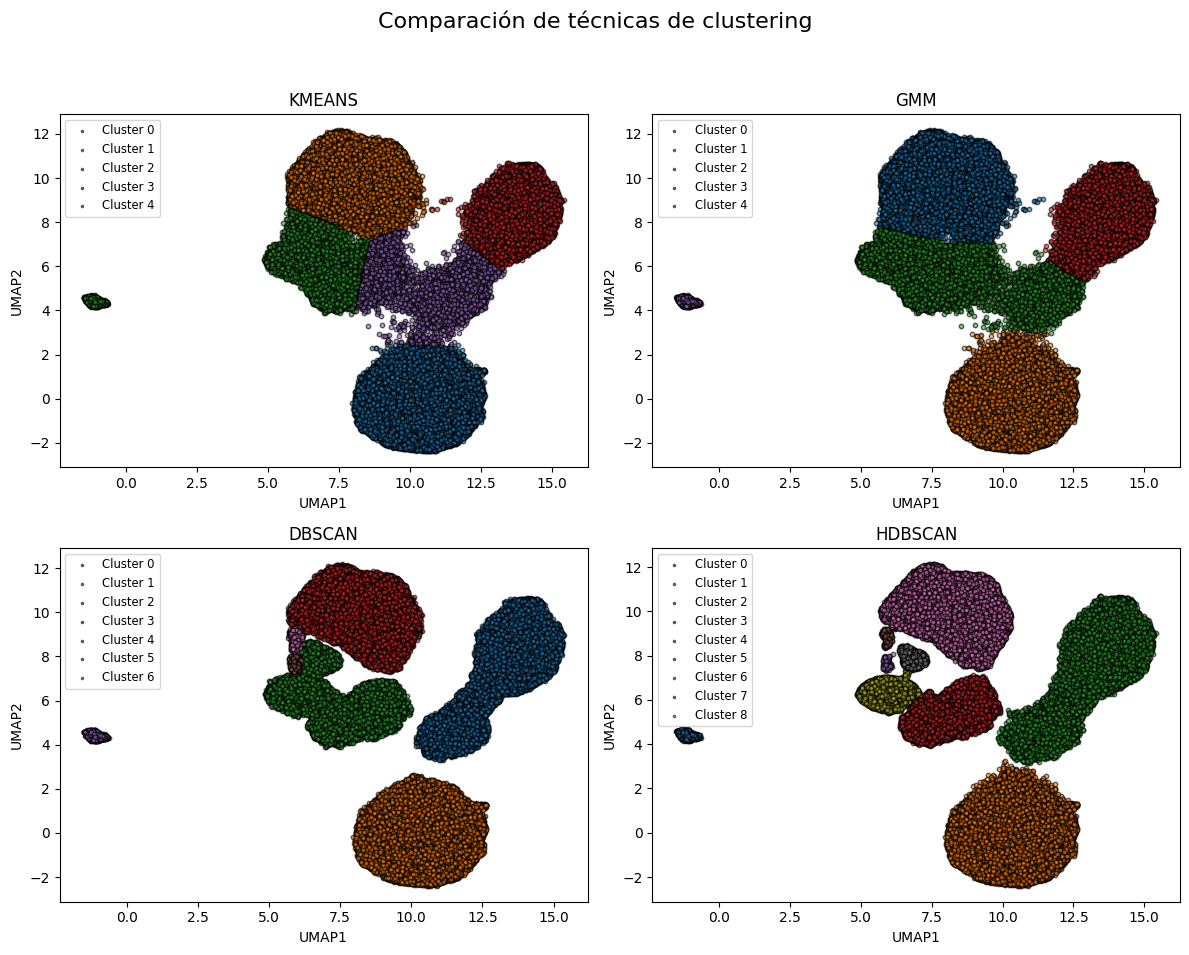

In [43]:
# Supongamos que ya tenés: z, pca, umap
import cryodrgn
from cryodrgn import analysis, utils, config

z_path = '/nfs/bartesaghilab2/ds672/master/workflow/experiments/empiar10076/2025_06_14_19_45_33_z8_ds320_iter1/z.59.pkl'
umap_path = '/nfs/bartesaghilab2/ds672/master/workflow/experiments/empiar10076/2025_06_14_19_45_33_z8_ds320_iter1/analysis_diego.59/umap.pkl'

z = utils.load_pkl(z_path)
umap = utils.load_pkl(umap_path)

# Clustering sobre UMAP
labels_kmeans = aplicar_clustering('kmeans', umap, n_clusters=5)
# plot_clusters(umap, labels_kmeans, title="KMeans sobre UMAP")

labels_gmm = aplicar_clustering('gmm', umap, n_clusters=5)
# plot_clusters(umap, labels_gmm, title="GMM sobre UMAP")

labels_dbscan = aplicar_clustering('dbscan', umap, eps=0.15, min_samples=50)
# plot_clusters(umap, labels_dbscan, title="DBSCAN sobre UMAP")

labels_hdbscan = aplicar_clustering('hdbscan', umap, min_cluster_size=50)
# plot_clusters(umap, labels_hdbscan, title="HDBSCAN sobre UMAP")

labels_dict = {
    "KMeans": labels_kmeans,
    "GMM": labels_gmm,
    "DBSCAN": labels_dbscan,
    "HDBSCAN": labels_hdbscan
}

# Mostrar todos los puntos, incluyendo ruido
#plot_all_clusterings(umap, labels_dict, show_noise=True)

# O eliminar el ruido de DBSCAN y HDBSCAN
plot_all_clusterings(umap, labels_dict, show_noise=False)

In [41]:
def plot_clusters_pr(data, labels, title="Clustering", show_noise=True):
        unique_labels = set(labels)
        if not show_noise:
            mask = labels != -1
            data = data[mask]
            labels = labels[mask]
            unique_labels = set(labels)

        plt.figure(figsize=(4,4))
        for label in unique_labels:
            cluster_points = data[labels == label]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                        label=f"Cluster {label}" if label != -1 else "Ruido",
                        alpha=0.6, edgecolors="k", s=10)
        
        plt.title(title)
        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.legend()
        plt.tight_layout()
        plt.show()

In [44]:
# import pickle

# labels_hdbscan_1_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_06_05_z8_ds128_par_92x_exp4/analysis_diego.34/hdbscan_umap/labels.pkl'
# labels_hdbscan_2_path = '/nfs/bartesaghilab2/ds672/empiar10076/experiments/2025_06_05_z8_ds128_par_92x_exp4/analysis_diego.39/hdbscan_umap/labels.pkl'

# with open(labels_hdbscan_1_path, 'rb') as archivo:
#     labels_hdbscan_1 = pickle.load(archivo)
# with open(labels_hdbscan_2_path, 'rb') as archivo:
#     labels_hdbscan_2 = pickle.load(archivo)

# labels_dict = {
#     "KMeans": labels_kmeans,
#     "GMM": labels_gmm,
#     "HDBSCAN1": labels_hdbscan_1,
#     "HDBSCAN2": labels_hdbscan_2
# }

# plot_clusters_pr(umap, labels_hdbscan_1, title="labels_hdbscan_1", show_noise=False)
# plot_clusters_pr(umap, labels_hdbscan_2, title="labels_hdbscan_2", show_noise=False)
# # Mostrar todos los puntos
# #plot_all_clusterings(umap, labels_dict, show_noise=True)

In [42]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

def remap_cluster_labels(X, labels_prev, labels_curr):
    """
    Renombra etiquetas de clustering actual para que coincidan con etiquetas anteriores,
    basándose en cercanía de centroides. No modifica los grupos ni las asignaciones.
    
    Parámetros:
        X: np.ndarray (n_samples, n_features)
            Coordenadas UMAP (o similares).
        labels_prev: np.ndarray (n_samples,)
            Etiquetas del clustering anterior (-1 es ruido).
        labels_curr: np.ndarray (n_samples,)
            Etiquetas del clustering actual (-1 es ruido).
    
    Devuelve:
        labels_curr_remap: np.ndarray
            Etiquetas actuales reenumeradas de forma coherente.
    """
    # Excluir ruido
    mask_prev = labels_prev != -1
    mask_curr = labels_curr != -1
    common_mask = mask_prev & mask_curr
    
    # Etiquetas únicas (excluyendo ruido)
    prev_ids = np.unique(labels_prev[mask_prev])
    curr_ids = np.unique(labels_curr[mask_curr])
    
    # Calcular centroides
    prev_centroids = np.array([X[labels_prev == i].mean(axis=0) for i in prev_ids])
    curr_centroids = np.array([X[labels_curr == i].mean(axis=0) for i in curr_ids])
    
    # Calcular matriz de distancias entre centroides
    distance_matrix = cdist(curr_centroids, prev_centroids)
    
    # Asignar etiquetas nuevas según distancia mínima (Hungarian algorithm)
    row_ind, col_ind = linear_sum_assignment(distance_matrix)
    
    # Mapear etiquetas actuales a etiquetas anteriores
    id_map = {}
    used_prev_ids = set()
    for i, j in zip(row_ind, col_ind):
        id_map[curr_ids[i]] = prev_ids[j]
        used_prev_ids.add(prev_ids[j])
    
    # Para clusters nuevos sin emparejar, asignar nuevos IDs no usados
    unused_id = max(prev_ids.max(), curr_ids.max(), -1) + 1
    for cid in curr_ids:
        if cid not in id_map:
            id_map[cid] = unused_id
            unused_id += 1
    
    # Aplicar mapeo
    labels_curr_remap = np.array([
        id_map[label] if label != -1 else -1
        for label in labels_curr
    ])
    
    return np.array(labels_curr_remap)


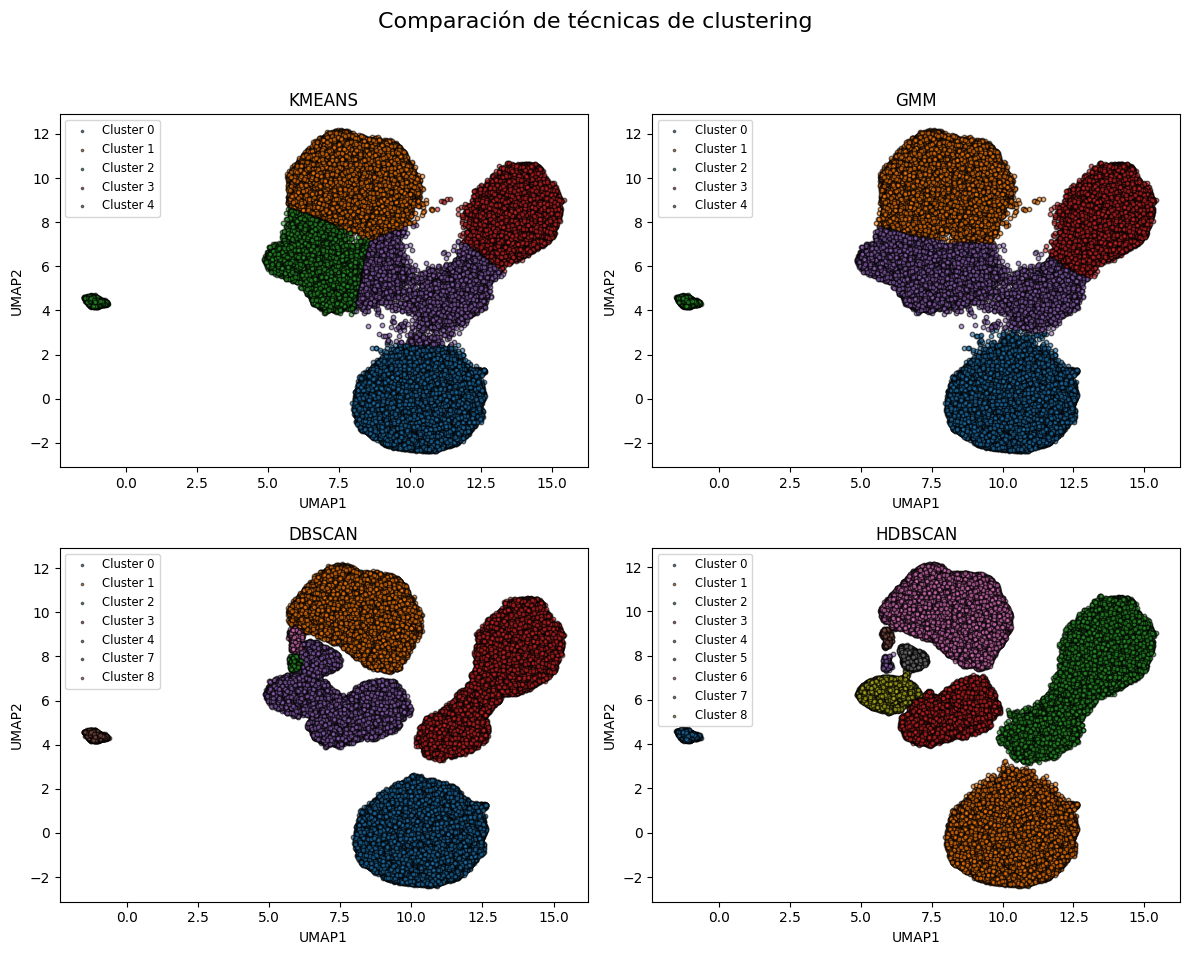

In [47]:
new_labels_gmm = remap_cluster_labels(umap, labels_kmeans, labels_gmm)
new_labels_dbscan = remap_cluster_labels(umap, labels_kmeans, labels_dbscan)
labels_dict = {
    "KMeans": labels_kmeans,
    "GMM": new_labels_gmm,
    "DBSCAN": new_labels_dbscan,
    "HDBSCAN": labels_hdbscan
}

# Mostrar todos los puntos, incluyendo ruido
#plot_all_clusterings(umap, labels_dict, show_noise=True)

# O eliminar el ruido de DBSCAN y HDBSCAN
plot_all_clusterings(umap, labels_dict, show_noise=False)

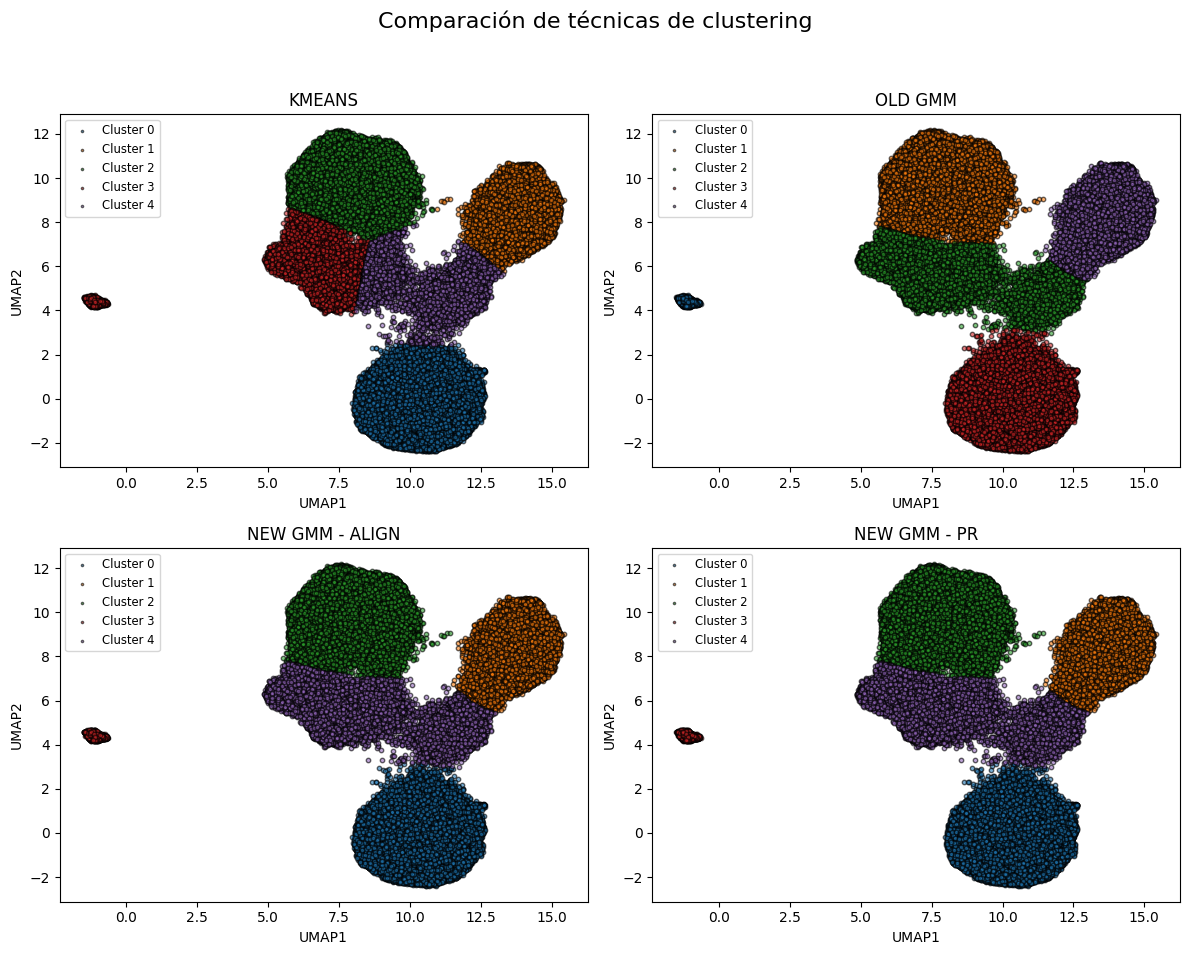

In [49]:
kmeans_labels_path = '/nfs/bartesaghilab2/ds672/master/workflow/experiments/empiar10076/2025_06_14_19_45_33_z8_ds320_iter1/analysis_diego.59/kmeans5_umap/labels.pkl'
old_gmm_labels_path = '/nfs/bartesaghilab2/ds672/master/workflow/experiments/empiar10076/2025_06_14_19_45_33_z8_ds320_iter1/analysis_diego.59/gmm5_umap/labels.pkl'
new_labels_gmm_align_path ='/nfs/bartesaghilab2/ds672/master/workflow/experiments/empiar10076/2025_06_14_19_45_33_z8_ds320_iter1/analysis_diego.59/gmm5_umap/new_labels.pkl'

kmeans_labels = utils.load_pkl(kmeans_labels_path)
gmm_labels = utils.load_pkl(old_gmm_labels_path)
new_gmm_labels_align = utils.load_pkl(new_labels_gmm_align_path)
new_gmm_labels_pr = remap_cluster_labels(umap, kmeans_labels, gmm_labels)

labels_dict = {
    "KMeans": kmeans_labels,
    "Old GMM": gmm_labels,
    "New GMM - Align": new_gmm_labels_align,
    "New GMM - Pr": new_gmm_labels_pr
}
plot_all_clusterings(umap, labels_dict, show_noise=False)
